In [2]:
import sys
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm 
from numpy import load, save 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from LocationAnomalyPCA import *

In [3]:
plt.rcParams["figure.figsize"] = (20,10)


In [4]:
X_traindf = pd.read_csv(r'C:\Users\nmadhar\Desktop\Conv_deep\ToSubmit\Data\XTrainLoc.csv').drop(['Unnamed: 0'],axis=1)
y_traindf = pd.read_csv(r'C:\Users\nmadhar\Desktop\Conv_deep\ToSubmit\Data\yTrainLoc.csv').drop(['Unnamed: 0'],axis=1)

X_testdf = pd.read_csv(r'C:\Users\nmadhar\Desktop\Conv_deep\ToSubmit\Data\XTestLoc.csv').drop(['Unnamed: 0'],axis=1)
y_testdf = pd.read_csv(r'C:\Users\nmadhar\Desktop\Conv_deep\ToSubmit\Data\yTestLoc.csv').drop(['Unnamed: 0'],axis=1)

In [5]:
Xtrain = np.array(X_traindf.iloc[:,:-3])
Xtest = np.array(X_testdf.iloc[:,:-3])

ytrain_loc = [list(y_traindf.iloc[i,:]).index(1)for i in range(y_traindf.shape[0]) ]

ytest_loc = [list(y_testdf.iloc[i,:]).index(1) for i in range(y_testdf.shape[0]) ]
ntrain,d = Xtrain.shape
ntest = Xtest.shape[0]
k = 20


## PCA for anomaly localisation 

Training PCA for outlier location on whole data set and localising the anomalies based on the reconstruction errors. 
### An all type of anomalies 

By types we mean extrema and non-extrema anomalies. 

In [6]:
# With dummy approach

pred_loc_dummy_train = dummyprediction(Xtrain)
ScoresTrain = EvaluationPred(pred_loc_dummy_train,ytrain_loc)
printRes(ScoresTrain,'Train')

pred_loc_dummy_test = dummyprediction(Xtest)


ScoresTest = EvaluationPred(pred_loc_dummy_test,ytest_loc)
printRes(ScoresTest,'Test')

------------Scores on Train-------------
Accuracy: 0.3487841945288754
Recall: 0.3487841945288754
Precision: 0.4053425842132874
F1-score: 0.36562204007976357

------------Scores on Test-------------
Accuracy: 0.277846688166708
Recall: 0.277846688166708
Precision: 0.31520156278320816
F1-score: 0.28937832830561305



0

In [7]:
# with PCA approach
norms_train, norms_test =  modelPCALocation(Xtrain,Xtest,k)

pred_loc_train = dummyprediction(norms_train)
ScoresTrainPCA = EvaluationPred(yPred = pred_loc_train,yTrue=ytrain_loc)

pred_loc_test = dummyprediction(norms_test)
ScoresTestPCA = EvaluationPred(yPred = pred_loc_test,yTrue=ytest_loc)


printRes(ScoresTrainPCA,'Train')
printRes(ScoresTestPCA,'Test')

100%|███████████████████████████████████████████████████████████████████████████| 4031/4031 [00:00<00:00, 12151.32it/s]


------------Scores on Train-------------
Accuracy: 0.8965298885511651
Recall: 0.8965298885511651
Precision: 0.8981681124332016
F1-score: 0.896823274794882

------------Scores on Test-------------
Accuracy: 0.9439345075663607
Recall: 0.9439345075663607
Precision: 0.9448988449153181
F1-score: 0.943797990883878



0

### On non extrema anomalies

In [10]:
# Keeping only non extrema anomalies 

XtrainNE, ytrain_locNE = ProcessingNotExtremum(X_traindf,y_traindf,ytrain_loc)
XtestNE, ytest_locNE = ProcessingNotExtremum(X_testdf,y_testdf,ytest_loc)


In [11]:
# Anomaly localisation performance with dummy approach 


pred_loc_dummy_train_NE = dummyprediction(XtrainNE)
ScoresTrain = EvaluationPred(pred_loc_dummy_train_NE,ytrain_locNE)
printRes(ScoresTrain,'Train')

pred_loc_dummy_test_NE = dummyprediction(XtestNE)


ScoresTest = EvaluationPred(pred_loc_dummy_test_NE,ytest_locNE)
printRes(ScoresTest,'Test')

------------Scores on Train-------------
Accuracy: 0.0
Recall: 0.0
Precision: 0.0
F1-score: 0.0

------------Scores on Test-------------
Accuracy: 0.0
Recall: 0.0
Precision: 0.0
F1-score: 0.0



0

In [12]:
# Anomaly localisation performance with PCA approach 

norms_train, norms_test =  modelPCALocation(XtrainNE,XtestNE,k)

pred_loc_train = dummyprediction(norms_train)
ScoresTrainPCA = EvaluationPred(yPred = pred_loc_train,yTrue=ytrain_locNE)

pred_loc_test = dummyprediction(norms_test)
ScoresTestPCA = EvaluationPred(yPred = pred_loc_test,yTrue=ytest_locNE)


printRes(ScoresTrainPCA,'Train')
printRes(ScoresTestPCA,'Test')

100%|███████████████████████████████████████████████████████████████████████████| 2911/2911 [00:00<00:00, 13106.82it/s]


------------Scores on Train-------------
Accuracy: 0.8422792687670168
Recall: 0.8422792687670168
Precision: 0.8455065768979428
F1-score: 0.8428338622612718

------------Scores on Test-------------
Accuracy: 0.919271727928547
Recall: 0.919271727928547
Precision: 0.9210239726355468
F1-score: 0.9189696603367107



0

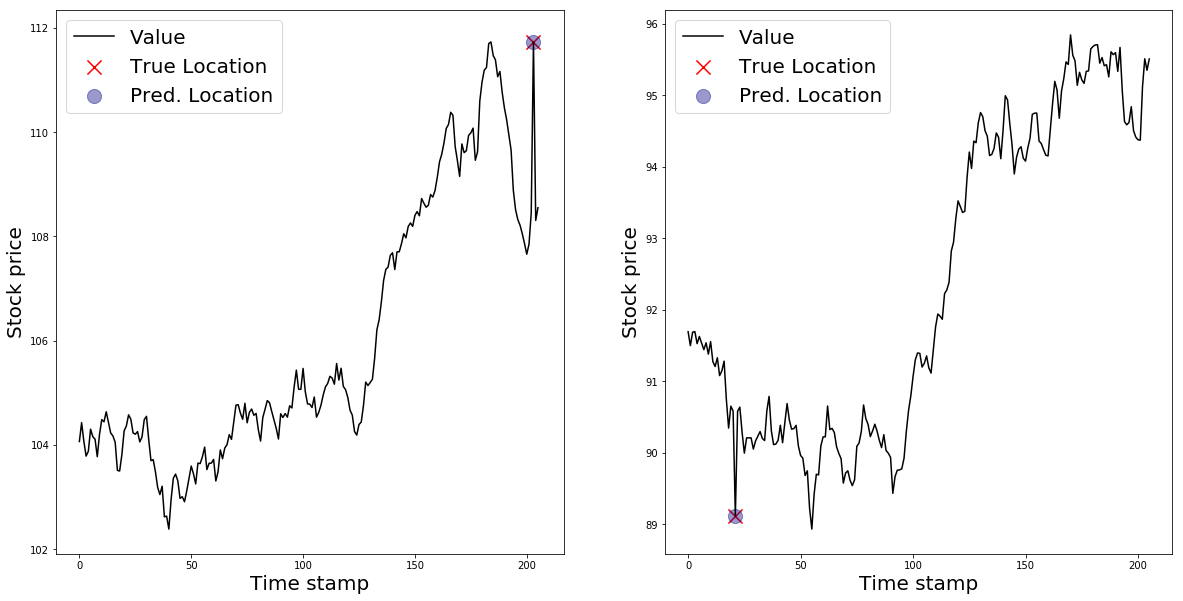

In [13]:
plt.subplot(1,2,1)
i = 405
plt.plot(XtestNE[i,:],color='black',label='Value')
plt.scatter(ytest_locNE[i],XtestNE[i,ytest_locNE[i]],label='True Location',marker='x',s= 200,color='red')
plt.scatter(pred_loc_test[i],XtestNE[i,pred_loc_test[i]],label='Pred. Location', marker ='o',s= 200,alpha=0.4,color='navy')
plt.xlabel('Time stamp',fontsize=20)
plt.ylabel('Stock price',fontsize=20)
plt.legend(fontsize=20)
plt.subplot(1,2,2)


i = 1144
plt.plot(XtestNE[i,:],color='black',label='Value')
plt.scatter(ytest_locNE[i],XtestNE[i,ytest_locNE[i]],label='True Location',marker='x',s= 200,color='red')
plt.scatter(pred_loc_test[i],XtestNE[i,pred_loc_test[i]],label='Pred. Location', marker ='o',s= 200,alpha=0.4,color='navy')
plt.xlabel('Time stamp',fontsize=20)
plt.ylabel('Stock price',fontsize=20)
plt.legend(fontsize=20)

plt.show()